In [2167]:
import pandas as pd
import numpy as np

def printT(obj, name=''):
    print(f' type of "{name}" is {type(obj)}')
    print()

In [2168]:
df = pd.read_csv('iris_challenging.csv')

In [2169]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.993117,2.500989,4.542148,1.348742,versicolor
1,5.657568,3.714626,1.800290,0.531637,setosa
2,7.751423,2.662903,7.174372,2.335111,virginica
3,5.938142,3.034625,4.448674,1.426435,versicolor
4,7.054747,2.741609,4.268965,1.469104,versicolor


In [2170]:
# Show records with missing values
# df.isna() returns a DataFrame of booleans for each element, True = value is missing, False = value is not missing.
# .any(axis=1) returns a series of booleans that checks if any row returned by df.isna() has True in it.
incomplete_row_indices = df.isna().any(axis=1)
incomplete_rows = df[incomplete_row_indices]
# It seems only the sepal width column has missing values.
# There are 8 missing rows out of 152
print(f'Number of incomplete rows: {len(incomplete_rows)}')
print(f'Total Number of rows: {len(df)}')
print(f'Percentage of rows that are incomplete: {(len(incomplete_rows) / len(df)) * 100}')
print('Displaying incomplete rows:')
incomplete_rows

Number of incomplete rows: 8
Total Number of rows: 152
Percentage of rows that are incomplete: 5.263157894736842
Displaying incomplete rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
18,5.635102,NaN,4.211992,1.538145,versicolor
31,5.911485,NaN,1.674489,0.613240,setosa
64,5.513339,NaN,4.311822,1.474508,versicolor
73,5.768455,NaN,5.306520,1.537974,virginica
76,6.185278,NaN,5.459096,2.080531,virginica
78,4.909547,NaN,1.678274,0.388903,setosa
118,5.676030,NaN,3.381097,1.117666,versicolor
141,6.560888,NaN,4.516092,0.931019,versicolor


In [2171]:
line_separator = '------------------------------------'
# sepal width string
sw_str = 'sepal width (cm)'
# data frame sepal width column
df_sw = df[sw_str]
# Sepal width mean
sw_mean = df_sw.mean()
print(f"average is: {sw_mean}")
sw_median = df[sw_str].median()
print(f"median is: {sw_median}")

# Here we show differences in their distributions.
print(line_separator)
print('Describing original sepal width column:')
# display(df_sw.describe().round(4))
display(df.describe().round(4))

print(line_separator)
print('Difference with mean imputation:')
mean_imputation = df.fillna(sw_mean)
# display((df_sw.describe() - mean_imputation[sw_str].describe()).round(4))
display((mean_imputation.describe() - df.describe()).round(4))

print(line_separator)
print('Difference with median imputation:')
median_imputation = df.fillna(sw_median)
# display(df_sw.describe() - median_imputation[sw_str].describe())
display(median_imputation.describe() - df.describe())

print(line_separator)
print('Difference with rows removed:')
missing_rows_removed = df.dropna()
# display(df[sw_str].describe() - missing_rows_removed[sw_str].describe())
display(missing_rows_removed.describe() - df.describe())

# TODO (mean or median imputation does not effect other columns, dropping does)
# Overall, the changes in std deviation for mean or median imputation is almost
# the same.

# Reasoning was helped by this article:
# https://pmc.ncbi.nlm.nih.gov/articles/PMC3668100/
# missing values will be filled using average.
# Usually people say to delete rows if its less than 5 percent of your data.
# But the missing rows is technically above 5 percent(5.263 percent).
# If MCAR was satisfied(meaning the missing values appear randomly throughout the dataframe) then their impact
# on any particular feature is spread out and thus minimized.
# However only the sepal width column has missing features. Mean imputation is only used within the feature it represents.
# Since there is only one column with missing values this fits that criteria.
# But it can still lead to bias since its not random at all.
# However since it is around 5 percent then the bias impact will be small. 
# And it will not destroy any data in the other feature columns. 
# As we can see below, dropping rows will affect the other columns.
# So I am willing to take the bias hit.

average is: 3.0505301438798096
median is: 3.033138148372734
------------------------------------
Describing original sepal width column:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,152.0000,144.0000,152.0000,152.0000
mean,5.8540,3.0505,3.7851,1.2323
std,0.9270,0.4698,1.8084,0.7559
min,4.1747,2.0000,1.0462,-0.1461
25%,5.0952,2.6929,1.6780,0.4796
50%,5.8110,3.0331,4.2808,1.3837
75%,6.4877,3.3712,5.1123,1.8398
max,10.0000,4.5720,8.0000,2.5562


------------------------------------
Difference with mean imputation:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,0.0,8.0000,0.0,0.0
mean,0.0,0.0000,0.0,0.0
std,0.0,-0.0126,0.0,0.0
min,0.0,0.0000,0.0,0.0
25%,0.0,0.0327,0.0,0.0
50%,0.0,0.0174,0.0,0.0
75%,0.0,-0.0247,0.0,0.0
max,0.0,0.0000,0.0,0.0


------------------------------------
Difference with median imputation:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,0.0,8.000000,0.0,0.0
mean,0.0,-0.000915,0.0,0.0
std,0.0,-0.012597,0.0,0.0
min,0.0,0.000000,0.0,0.0
25%,0.0,0.032725,0.0,0.0
50%,0.0,0.000000,0.0,0.0
75%,0.0,-0.024694,0.0,0.0
max,0.0,0.000000,0.0,0.0


------------------------------------
Difference with rows removed:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,-8.000000,0.0,-8.000000,-8.000000
mean,0.004667,0.0,-0.001796,0.001224
std,0.019277,0.0,0.021135,0.011054
min,0.000000,0.0,0.000000,0.000000
25%,-0.025693,0.0,-0.010170,-0.008403
50%,0.010330,0.0,0.000000,0.000000
75%,0.011338,0.0,0.000000,0.031298
max,0.000000,0.0,0.000000,0.000000


In [2172]:
# There are no duplicated rows given the deep precision of all the floating point values.
# duplicated() does ignore the index column and only looks at feature columns.
# No action is required.
print(df.duplicated().any())
print(mean_imputation.duplicated().any())
print(median_imputation.duplicated().any())
print(missing_rows_removed.duplicated().any())

False
False
False
False


In [2173]:
# fill in values for future computations
df = df.fillna(sw_mean)

In [2174]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

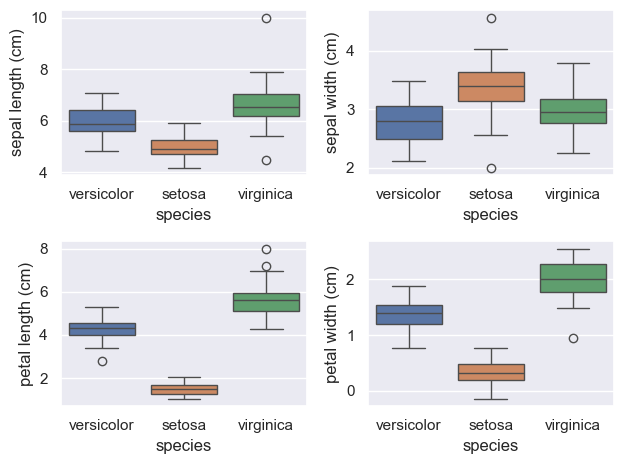

In [2175]:
# BoxPlot outliers are represented by little dots that are outside of the whiskers of a box plot.
import matplotlib.pyplot as plt

# A 2x2 matrix of boxplots will be created, giving a total of four graphs.
figure, axes = plt.subplots(2,2)

# https://seaborn.pydata.org/tutorial/function_overview.html was used for
# reference here.

# axes is just an array of matplotlib Axes objects
# ".flat" turns numpy arrays into 1d arrays, axes by itself is a 2x2 matrix
for index, axis in enumerate(axes.flat):
    sns.boxplot(data=df, x='species', y=df.columns[index], hue='species', ax=axis)

figure.tight_layout()

# Note: Ranges given are visual estimates.

# For the sepal length graph, the virginica species usually ranges from 5 to 8 cm, 
# but has 2 outliers ranging from 4.25(ish) to 10 cm.

# For the sepal width graph, the setosa species ranges from 2.5 to almost 4 cm,
# but has 2 outliers ranging from 2 to almost 5 cm.

# For the petal length graph, the versicolor species ranges from 3.75 to almost 5.5 cm,
# but has an outlier near 2.5 cm.
# The virginica species usually ranges from 4 to 6.5 cm, 
# but has 2 outliers ranging from above 6.5 to 8 cm.

# For the petal length graph, the virginica species ranges from 1.5 to almost 2.5 cm,
# but has an outlier near 1 cm.

# On the petal width graph you can see there are negative values for setosa which would count
# as measurement errors.

# But for outliers that are not impossible(non negative), the virginica species has the most
# (5 outliers). The virginica species does seem to generally have longer length(petal and sepal)
# This longer length could lead to more errors as when the human hand grasps a petal and tries
# to measure it with a ruler there is a chance they did not flatten the petal enough.
# Smaller petals are easier to grasp and flatten against a ruler.


In [2176]:
# Question 1 part 3

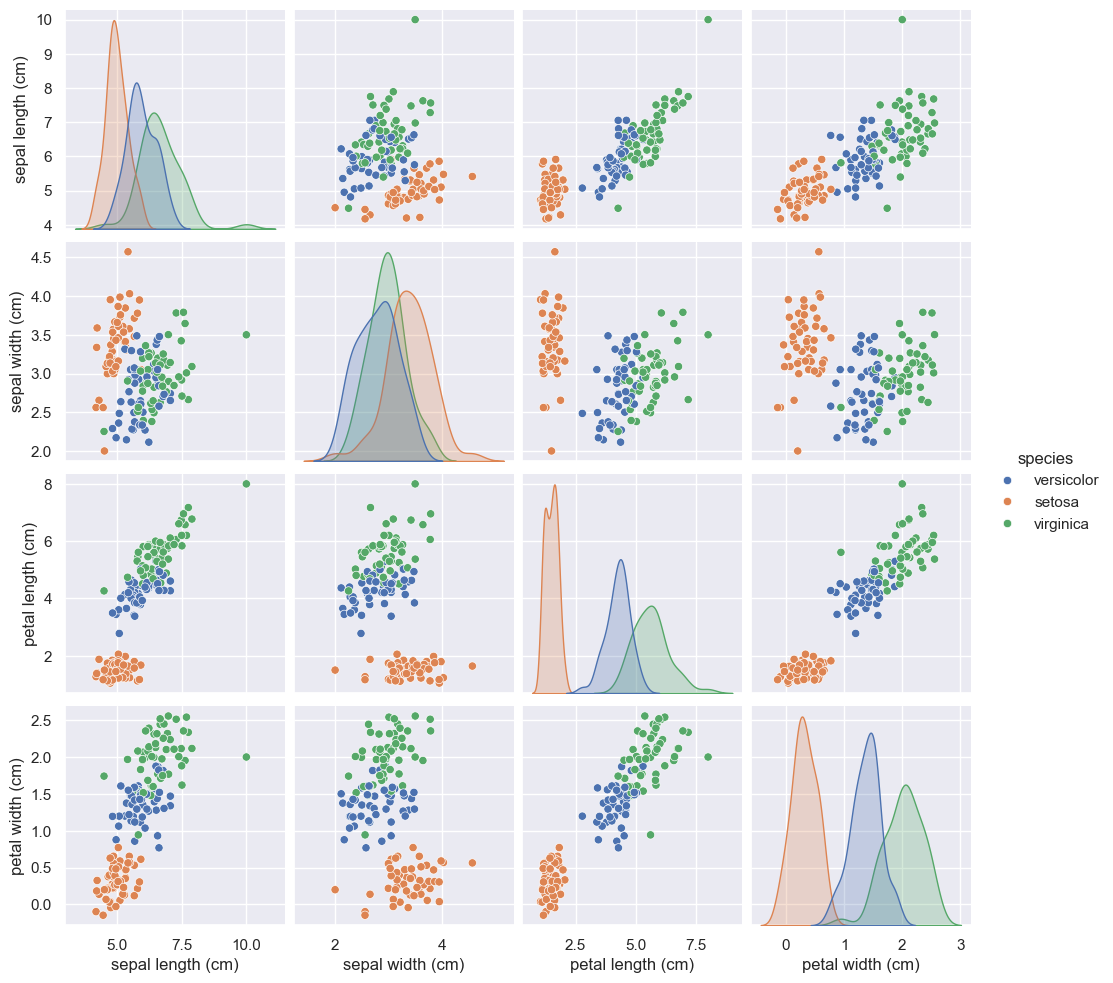

In [2177]:
# https://seaborn.pydata.org/tutorial/function_overview.html was used for
# reference here.
sns.pairplot(df, hue="species")

# Top 2 features where the species differ is in petal length and petal width.
# From what we can see, the setosa species tends to be much shorter than the other
# 2 species. The pair of those two features(width,length or length,width) shows
# setosa is clustered far away from the other two species.
# The other 2 species seems to overlap somewhat.

# The pairplot shows graphs for each possible pair of features.
# This helps find patterns like the petal length and petal width pattern,
# that shows setosa being different.

<Axes: >

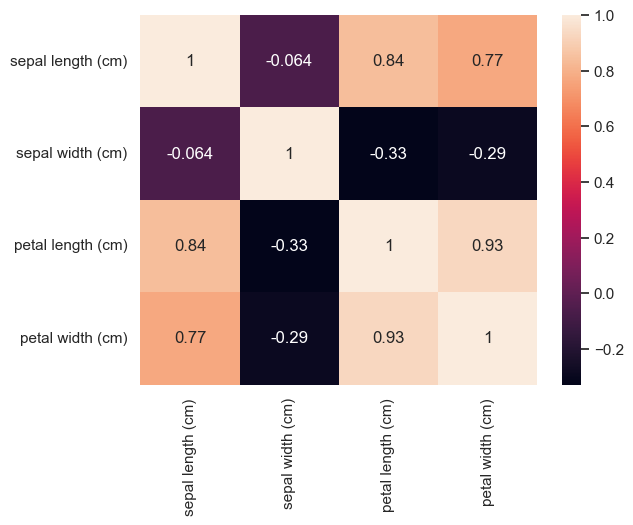

In [2178]:
# Heatmap correlation, ignore index column
features_only = df.drop('species', axis='columns')

# Annotation set to true so correlation numbers show up.
sns.heatmap(features_only.corr(), annot=True)

# As we can see a feature is obviously correlated with itself(as 1.0).
# But the highest correlated feature pair is petal length to sepal length.
# This makes sense since sepals surround or cover up the petals, so they
# should ideally be just as long or longer than petals.

# Sepal width and petal length have not quite opposite correlation
# but they certainly don't help eachother. The reason may be due to evolution.
# As sepals and petals close inward, their most important function is to stop insects
# from getting inside from the top as that is the most vulnerable spot.

In [2179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Normalization = (current value - min value) / (max value - min value)
# Standardization = (current value - average of column) / std dev of column
from sklearn.preprocessing import StandardScaler
# For cross validation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

import math

In [2180]:
def shuffle_dataframe(dataframe):
    # fixed random state so splits are the same each time
    return dataframe.sample(frac=1, random_state=10, ignore_index=True)

# Split function for splitting original dataframe into the main training set and the main test set.
# Further splits can be done during cross validation, where main training set -> (sub training set, validation set).
def split_data(dataframe):
    # Separate out features and labels
    features = dataframe.drop('species', axis='columns')
    labels = dataframe['species']
    # stratify by labels so subsets represent all the classes proportionally
    return train_test_split(features, labels, stratify=labels, test_size=0.2, random_state=10)

# Helper function to reduce boiler plate.
def knn_helper(features, labels, to_predict, k, distance_method):
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_method)

    # just copies data into knn object
    knn.fit(features, labels)

    # make prediction for test features
    pred = knn.predict(to_predict)
    return pred

def knn_accuracy(features, labels, to_predict, actual_labels, k, distance_method):
    pred = knn_helper(features, labels, to_predict, k, distance_method)
    accuracy = accuracy_score(actual_labels, pred)
    return accuracy

In [2181]:
# first shuffle, then split
shuffled_df = shuffle_dataframe(df)
shuffled_features = shuffled_df.drop('species', axis='columns')
shuffled_labels = shuffled_df['species']
train_features, test_features, train_labels, test_labels = split_data(shuffled_df)

# Here we scale the features only once before proceeding to rest of the problem
sScaler = StandardScaler()
train_features_scaled = sScaler.fit_transform(train_features)
# With mean and std dev set already, we just call transform on feature_labels
test_features_scaled = sScaler.transform(test_features)

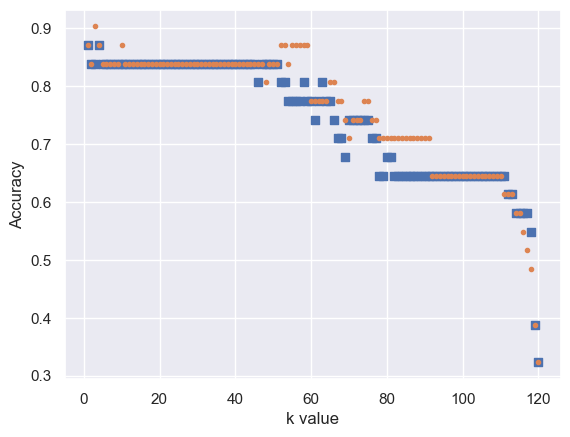

In [2207]:
# Now we visually compare euclidean and manhattan distances

# We will test all possible K values for our euclidean and manhattan experimentation.
maxK = len(train_features_scaled)

def plotAccuracy(distanceType, markerType):
    accuracies = []
    
    for k in range(1,maxK):
        acc = knn_accuracy(train_features_scaled, train_labels, test_features_scaled, test_labels, k, distanceType)
        accuracies.append(acc)

    plt.scatter(x=list(range(1, maxK)), y=accuracies, marker=markerType)
    
    plt.xlabel('k value')
    plt.ylabel('Accuracy')

plotAccuracy('euclidean', 's')
plotAccuracy('manhattan', '.')

# As we can see, as K increases the accuracy decreases. This is most like due to outliers skewing the predictions.
# KNN has no defense against outliers.
# Alot of accuracies seem to roughly match in k ranges of 1 to 50
# and 90 to 110. Around 110 k there is a very steep decline in accuracy.

best score is 0.9144086021505377, best k is 2


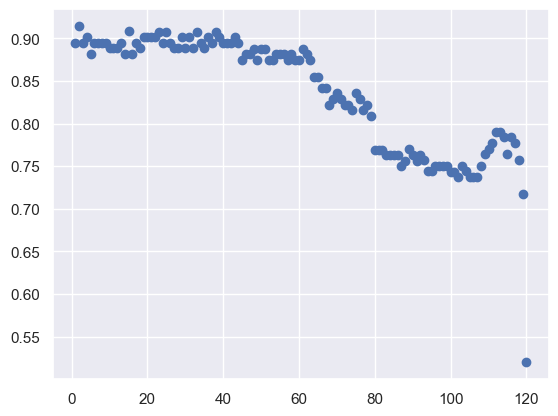

In [2183]:
# Use KNN to predict species based of petal,sepal -> width and height
# NOTE: please wait several seconds for loop to finish, it is a bit slow
avg_accuracies = []

# K cannot be the entire dataframe since 1/5th of the rows
# will be used for testing.
best_k = 1
best_score = 0

# display(features)
# display(labels)

for k in range(1, maxK):
    # Pipeline is essentially a list of operations applied to data given
    # to it in sequential order.
    estimator_pipeline = Pipeline([
        ('scaler',  StandardScaler()),
        ('knn_model', KNeighborsClassifier(n_neighbors=k, metric='euclidean'))
    ])
    
    score = cross_val_score(estimator_pipeline, shuffled_features, shuffled_labels).mean()
    avg_accuracies.append(score)

    # update score
    if score > best_score:
        best_score = score 
        best_k = k
    
print(f"best score is {best_score}, best k is {best_k}")
plt.scatter(x=list(range(1, maxK)), y=avg_accuracies)

# Again we see how accuracies are degrading as k increases.
# K shows significant drops in value around K = 60, 80, and 115.
# It does take some seconds(usually 6 to 10) to do all this cross validation
# since its using each 1/5th of the training data as a validation set.


In [2184]:
# KNN using best k found

# bets distance method was euclidean
print(f'Best accuracy is: {knn_accuracy(train_features_scaled, train_labels, test_features_scaled, test_labels, best_k, 'euclidean')}')

predicted_labels = knn_helper(train_features_scaled, train_labels, test_features_scaled, best_k, 'euclidean')

# graph predicted and test labels
data = {
    'Predictions' : predicted_labels,
    'Correct Species' : test_labels,
}

prediction_table = pd.concat([pd.DataFrame(data), pd.DataFrame(test_features)], axis=1)
wrong_predictions = prediction_table[prediction_table['Predictions'] != prediction_table['Correct Species']]

display(wrong_predictions)
wrong_predictions.describe()

# Versicolor is the most misclassified. 2nd place goes to virginica with 1 misclassification.
# It seems Versicolor is the most difficult to classify.
# Setosa seems to be the easiest.
# For the first two rows it seems sepal length, sepal width, and petal length
# have similar values to the fourth row. While the third row usually differs
# from fourth. So that might not be whats causing versicolor and virginica
# to differ. But it might be why versicolor is misclassified the most.
# But that pattern is broken in the fourth row where the versicolor's petal width
# is consistently around 1.5 while virginica is noticably larger.
# Basically the versicolor values of sepal length, sepal width, and petal length
# seems to surround or encompass the values in virginica.
# Hence why the table shows them being confused for each other.

Best accuracy is: 0.8387096774193549


,Predictions,Correct Species,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
80,versicolor,virginica,6.386602,2.647653,4.687089,1.599591
95,versicolor,virginica,6.296112,2.613482,4.841012,1.478976
143,versicolor,virginica,5.768455,3.050530,5.306520,1.537974
130,versicolor,virginica,6.182383,2.873320,5.814199,1.683440
33,virginica,versicolor,6.774866,2.702907,4.811899,1.816408


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,5.000000,5.000000,5.000000,5.000000
mean,6.281684,2.777578,5.092144,1.623278
std,0.363218,0.182382,0.467171,0.131890
min,5.768455,2.613482,4.687089,1.478976
25%,6.182383,2.647653,4.811899,1.537974
50%,6.296112,2.702907,4.841012,1.599591
75%,6.386602,2.873320,5.306520,1.683440
max,6.774866,3.050530,5.814199,1.816408


In [2271]:
# Naive bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_features, train_labels)

# Sanity check
print(f"Classes: {gnb.classes_}")
print(f"Sample per class: {gnb.class_count_}")
print(f"Feature means shape:", gnb.theta_.shape)
print(f"Feature variances shape:", gnb.var_.shape)

print('Average of each feature per class(rows are the categories, columns are the features):')
display(gnb.theta_)

gaussian_pred = gnb.predict(test_features)
checked_pred = gaussian_pred == test_labels
print(f'Number of predictions: {len(checked_pred)}')
print(f'Number of Correct predictions: {checked_pred.sum()}')
print(f'Percentage of predictions that are correct: {gnb.score(test_features,test_labels)}')
print(accuracy_score(test_labels, gaussian_pred))

misclassified = gaussian_pred != test_labels

# show features + predictions + true output
misclassified_df = pd.DataFrame(test_features[misclassified])
misclassified_df['actual'] = test_labels[misclassified]
misclassified_df['prediction'] = gaussian_pred[misclassified]
misclassified_df

Classes: ['setosa' 'versicolor' 'virginica']
Sample per class: [41. 40. 40.]
Feature means shape: (3, 4)
Feature variances shape: (3, 4)
Average of each feature per class(rows are the categories, columns are the features):


array([[5.02583476, 3.39071054, 1.50042017, 0.32226613],
       [5.94758966, 2.81601085, 4.26954136, 1.34966575],
       [6.75826055, 3.01628928, 5.67495152, 2.03463697]])

Number of predictions: 31
Number of Correct predictions: 26
Percentage of predictions that are correct: 0.8387096774193549
0.8387096774193549


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual,prediction
80,6.386602,2.647653,4.687089,1.599591,virginica,versicolor
95,6.296112,2.613482,4.841012,1.478976,virginica,versicolor
143,5.768455,3.050530,5.306520,1.537974,virginica,versicolor
33,6.774866,2.702907,4.811899,1.816408,versicolor,virginica
77,6.605663,2.841501,5.008664,1.823922,versicolor,virginica
